In [ ]:
#Using MLP Classification techniques and analysis to determine the severity of forest fires
#Predicting Forest Fire Probability And Severity Using A Multi-layer Perceptron Classifier On Meteorological Data
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['ALGERIANFORESTFIRES.csv'].decode('utf-8')))
df.head()

Saving ALGERIANFORESTFIRES.csv to ALGERIANFORESTFIRES (1).csv


,temp,RH,wind,rain,area
0,29,57,18,0.0,0
1,29,61,13,1.3,0
2,26,82,22,13.1,0
3,25,89,13,2.5,0
4,27,77,16,0.0,0


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files
import os
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup
from keras import callbacks
from sklearn.model_selection import train_test_split

     temp  RH  wind  rain  area
0      29  57    18   0.0     0
1      29  61    13   1.3     0
2      26  82    22  13.1     0
3      25  89    13   2.5     0
4      27  77    16   0.0     0
..    ...  ..   ...   ...   ...
238    30  65    14   0.0     1
239    28  87    15   4.4     0
240    27  87    29   0.5     0
241    24  54    18   0.1     0
242    24  64    15   0.2     0

[194 rows x 5 columns]


<AxesSubplot:>

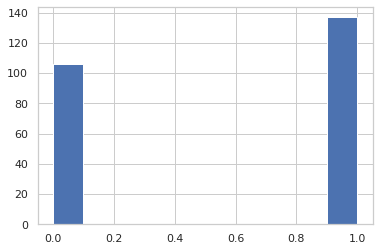

In [ ]:
val_dataframe = df.sample(frac=0.2, random_state=1337)
train_dataframe = df.drop(val_dataframe.index)
print(train_dataframe)
df.shape
df.area.hist()

In [ ]:
def dataframe_to_dataset(df):
    df = df.copy()
    labels = df.pop("area")
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    return ds

a = len(df.index)
train_ds = dataframe_to_dataset(train_dataframe)
print(train_ds)
val_ds = dataframe_to_dataset(val_dataframe)
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)
#for portuguese confusion matrix to work
#train_ds = train_ds.batch(int(2*a/3))
#val_ds = val_ds.batch(int(a/3))
train_ds = train_ds.batch(50)
val_ds = val_ds.batch(50)

<ShuffleDataset element_spec=({'temp': TensorSpec(shape=(), dtype=tf.int64, name=None), 'RH': TensorSpec(shape=(), dtype=tf.int64, name=None), 'wind': TensorSpec(shape=(), dtype=tf.int64, name=None), 'rain': TensorSpec(shape=(), dtype=tf.float64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>
Input: {'temp': <tf.Tensor: shape=(), dtype=int64, numpy=34>, 'RH': <tf.Tensor: shape=(), dtype=int64, numpy=59>, 'wind': <tf.Tensor: shape=(), dtype=int64, numpy=16>, 'rain': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>}
Target: tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer
    normalizer = Normalization(input_shape = [1,])
    tf.keras.layers.Input(shape=(1,))
    # Prepare a Dataset
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the stats
    normalizer.adapt(feature_ds)

    # Normalize the input
    encoded_feature = normalizer(feature)
    return encoded_feature

In [ ]:
temp = keras.Input(shape=(1,), name="temp")
wind = keras.Input(shape=(1,), name="wind")
rain = keras.Input(shape=(1,), name="rain")
RH = keras.Input(shape=(1,), name="RH")

In [ ]:
all_inputs = [
    temp,
    wind,
    rain,
    RH,
]
temp_encoded = encode_numerical_feature(temp, "temp", train_ds)
wind_encoded = encode_numerical_feature(wind, "wind", train_ds)
rain_encoded = encode_numerical_feature(rain, "rain", train_ds)
RH_encoded = encode_numerical_feature(RH, "RH", train_ds)
all_features = layers.concatenate(
    [
        temp_encoded,
        wind_encoded,
        rain_encoded,
        RH_encoded,
    ]
)
#model = keras.Model(all_inputs, output)
#model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
x = layers.Dense(32, activation="relu")(all_features)
x=layers.Dropout(0.5)(x)
x = layers.Dense(32, activation="linear")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
#x = layers.Dense(32, activation="relu")(all_features)
#x = layers.Dense(32, activation="linear")(all_features)
#x = layers.Dropout(0.5)(x)
#output = layers.Dense(1, activation="sigmoid")(x)
#model = keras.Model(all_inputs, output)
#model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
#from tensorflow import keras

#model = keras.Sequential(
 #   [
  #      keras.layers.Dense(
   #         256, activation="relu", input_shape=(all_features.shape[-1],)
    #    ),
     #   keras.layers.Dense(256, activation="relu"),
      #  keras.layers.Dropout(0.3),
       # keras.layers.Dense(256, activation="relu"),
        #keras.layers.Dropout(0.3),
        #keras.layers.Dense(1, activation="sigmoid"),
   # ]
#)
#model.compile(
 #   optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics="accuracy"
#)

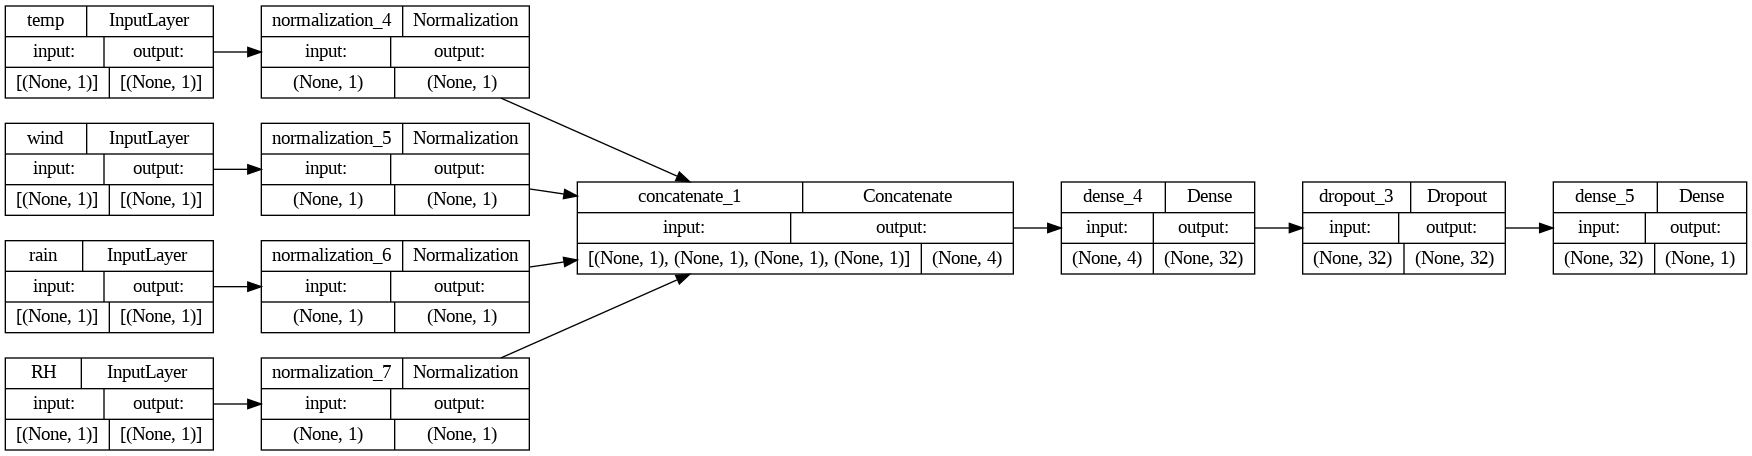

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")


In [ ]:
#np.expand_dims(train_ds, axis = 0)
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy",
										mode ="max", patience = 30,
										restore_best_weights = True)
history = model.fit(train_ds, epochs=100, validation_data=val_ds,callbacks =[earlystopping])

Epoch 1/100
4/4 [==============================] - 1s 76ms/step - loss: 0.7152 - accuracy: 0.5670 - val_loss: 0.6709 - val_accuracy: 0.5714
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7314 - accuracy: 0.5464 - val_loss: 0.6569 - val_accuracy: 0.6531
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6771 - accuracy: 0.5412 - val_loss: 0.6439 - val_accuracy: 0.6735
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6314 - accuracy: 0.6804 - val_loss: 0.6316 - val_accuracy: 0.6735
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6295 - accuracy: 0.6237 - val_loss: 0.6213 - val_accuracy: 0.6122
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5883 - accuracy: 0.7320 - val_loss: 0.6117 - val_accuracy: 0.6531
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5975 - accuracy: 0.7165 - val_loss: 0.6031 - val_accuracy: 0.6531
Epoch 8/100
4/4 [====

In [ ]:
score_dense = model.evaluate(train_ds, verbose=0)
print(score_dense) # max score validity

[0.4414732754230499, 0.7989690899848938]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

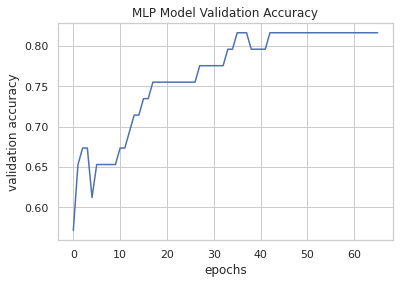

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.title('MLP Model Validation Accuracy')
plt.show()

1/1 [==============================] - 0s 6ms/step
tf.Tensor(
[0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 0 0 0 0 0 1 0 1 1], shape=(49,), dtype=int64)


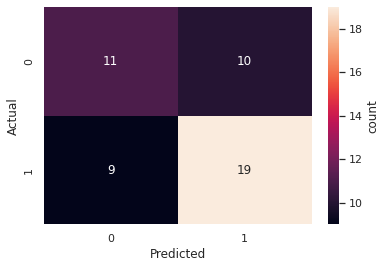

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
predictions=model.predict(val_ds)
predictions=predictions.ravel()
predictions = (model.predict(val_ds) > 0.5).astype("int32")
for x,y in val_ds:
  print(y)
  confusion = confusion_matrix(y, predictions)
  sns.heatmap(confusion, annot = True, fmt = 'd', cbar_kws={'label':'count'});
#val_ds.shape()
#predictions=predictions.reshape((1))
#confusion = confusion_matrix(val_ds, predictions)
#sns.heatmap(confusion, annot = True, fmt = 'd', cbar_kws={'label':'count'});
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [ ]:
#ANALYSIS
#there is a jump from 60-64% from decision trees to neural network using Portugal dataset - linear + sigmoid
#there is an 81.63% validation accuracy in predicting whether a fire will occur or not (Algerian dataset) -linear + sigmoid
#improved algerian by using portugal dataset to predict area affected as well
#diff datasets and methods to solve portugal problem
#I have corroborated the portugal dataset with algerian dataset and imporved upon by using a different method than what portugal did
#patterns between different locations - using different method to analyze
#find factors that impact the fire the most between both datasets - they don't know how a fire comes? i know it can come b/c of xyz thing being large
#fire yes no? big fire yes no?

In [ ]:
# only for if data is Algerian Forest Fire Data
#Sisikoyou County Data during the latest 97 fire which burned 30 acres

#9/27 - 9/29
#"temp": 31.6667,
#"wind": 38.6243,
#"rain": 0,
#"RH": 63,

#9/2 Siskiyou County Mill Fire (large fire) - data predicted as a 95.9% chance of a fire occurring on this day
#given a 95.9% chance of a fire

#"temp": 38.8889,
#"wind": 37.0149,
#"rain": 0,
#"RH": 31,

#9/1 - the day preceding the fire is already highly suspected by this model giving a 94.5%
#chance of a fire
#"temp": 37.7778,
#"wind": 16.0934,
#"rain": 0,
#"RH": 37,

#9/2 being shown currently


#change F to C and mi to km - Conversions
#why is max for temp etc. good?

#temperature = 102.00002 #F
#wind = 23 #mph
#rain = 0 #mm
#RH = 31 #no units

#today
temperature = 52
wind = 21
rain = 0.11
RH = 73

#temperature = 102
#wind = 23
#rain = 0
#RH = 37
sample = {
    "temp": (temperature-32)*5/9,
    "wind": 1.609344*wind,
    "rain": rain,
    "RH": RH,
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "This particular case had a %.1f percent probability "
    "of having a forest-fire, as evaluated by our model." % (100 * predictions[0][0],)
)

#predicted probability of forest fire
#accuracy extracted

1/1 [==============================] - 0s 27ms/step
This particular case had a 0.6 percent probability of having a forest-fire, as evaluated by our model.
